# Comparaison du notre jeu avec celui de coding games

## Modification de la classe Board 

**Ici je crée une board identique à la seed codingames que l'ai récupéré**

La seed:  

seed=897533898  
pod_timeout=100  
map=14010 2995 4004 7791 12007 1982 10700 5025  
pod_per_player=1  

In [1]:
import math
import numpy as np
import matplotlib.pyplot as plt
from MPRengine import Pod, CheckPoint,  CP_WIDTH, HEIGHT, WIDTH

TIMEOUT = 100

class Board():
    def __init__(self,nb_cp, nb_round):
        self.terminated = False
        self.nb_round = nb_round
        self.nb_cp = nb_cp
        self.checkpoints = []
        self.checkpoint_cp = [0]*nb_cp

        # ajout manuel des checkpoints
        self.checkpoints.append(CheckPoint(14010, 2995,0))
        self.checkpoints.append(CheckPoint(4004, 7791,1)) #7791
        self.checkpoints.append(CheckPoint(12007, 1982,2))
        self.checkpoints.append(CheckPoint(10700, 5025,3))

        self.next_checkpoint = 0
        first_cp_x, first_cp_y = self.checkpoints[self.next_checkpoint].getCoord()

        self.pod = Pod(first_cp_x, first_cp_y , 0 )
        

    def updateToNextCheckpoint(self):
        if self.pod.distance(self.checkpoints[self.next_checkpoint])<CP_WIDTH:
            self.pod.timeout = TIMEOUT
            self.checkpoint_cp[self.next_checkpoint]+=1
            self.next_checkpoint = (self.next_checkpoint +1)% self.nb_cp
    
    def checkTerminated(self):
        # print(self.checkpoint_cp)
        # print([self.nb_round]*self.nb_cp)
        if self.checkpoint_cp == [self.nb_round]*self.nb_cp or self.pod.timeout<0:
            self.terminated = True
    
    def play(self, p,thrust):
        self.pod.play(p,thrust)
        self.updateToNextCheckpoint()
        self.checkTerminated()
        x,y= self.pod.getCoord()
        next_cp = self.checkpoints[self.next_checkpoint]
        next_cp_x , next_cp_y = next_cp.getCoord()
        dist = self.pod.distance(next_cp)
        angle = self.pod.getAngle(next_cp)

        # print(self.pod.timeout)

        return x,y,next_cp_x,next_cp_y,dist,angle
    
    def getInfos(self):
        return HEIGHT, WIDTH

## Affichage de la trajectoire du pod

Ici j'affiche la trajectoire du pod tel qu'elle est dans le jeu de base

[14226, 14134]
[3446, 3485]
290


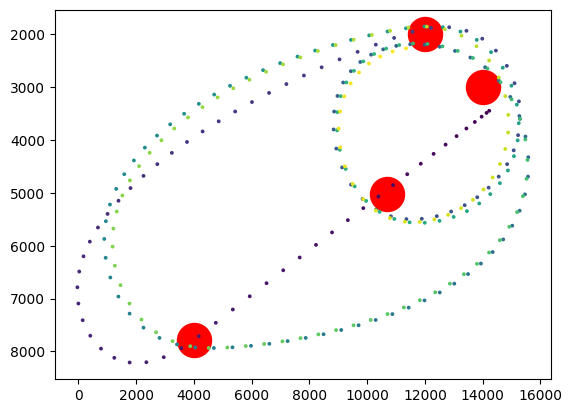

In [2]:
import re

def extract_xy(input_file):
    lx = []
    ly = []
    with open(input_file, 'r') as infile:
        for line in infile:
            match = re.search(r"x: (-?\d+) y: (-?\d+)", line)
            if match:
                x, y = match.groups()
                lx.append(int(x))
                ly.append(int(y))

    return lx, ly



lx, ly = extract_xy("../../Playground/fichier2.txt")

print(lx[:2])
print(ly[:2])

bx = [14010, 4004, 12007, 10700]
by = [2995, 7791, 1982, 5025]
print(len(lx))



plt.figure()
plt.gca().invert_yaxis() 
plt.scatter(bx,by, c = 'red', s=600)
plt.scatter(lx,ly,c  = np.arange(len(lx)), s= 3)

plt.show()

## Lancement de la simulation

Ici je lance la simulation de notre jeu tel qu'il est

295


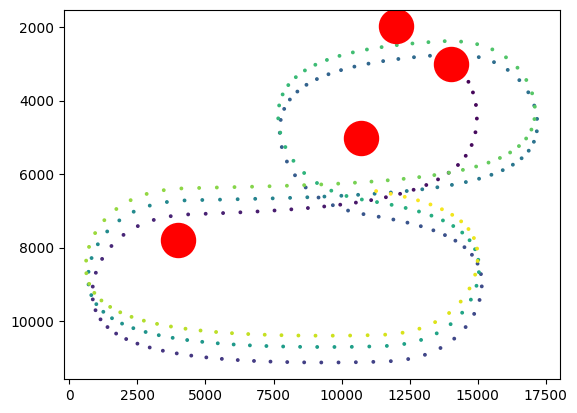

In [3]:
def main():
    board = Board(4,3)
    l_x = []
    l_y=[]

    b_x= [b.getCoord()[0] for b in board.checkpoints]
    b_y= [b.getCoord()[1] for b in board.checkpoints]
    
    while not board.terminated:
        x,y,next_cp_x,next_cp_y,dist,angle = board.play(board.checkpoints[board.next_checkpoint], 100)
        # print(x,y,next_cp_x,next_cp_y,dist,angle)
        l_x.append(x)
        l_y.append(y)
 

    print(len(l_x))
    plt.figure()
    plt.gca().invert_yaxis() 
    plt.scatter(l_x,l_y,c  = np.arange(len(l_x)), s = 3)
    plt.scatter(b_x,b_y, c = 'red', s=600)
    plt.show()

main()

Angle du premier point (en radians) : 0


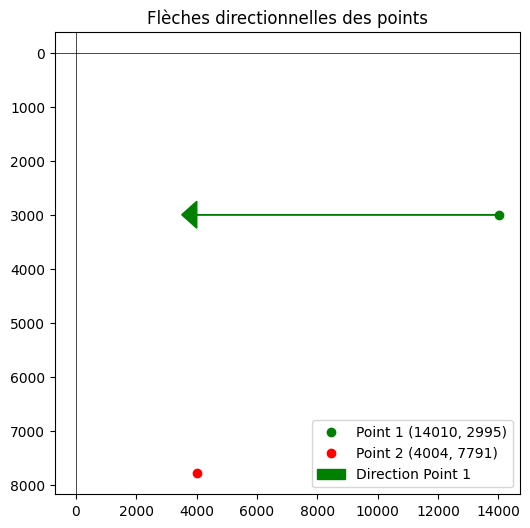

In [4]:
import matplotlib.pyplot as plt
import math

# Coordonnées des deux points (x1, y1) et (x2, y2)
x1, y1 = 14010, 2995
x2, y2 = 4004, 7791

# Calcul de l'angle du premier point vers le deuxième point
# angle1 = math.atan2(y2 - y1, x2 - x1)  # Calcul de l'angle entre les deux points
angle1 = 0

# Affichage des angles
print(f"Angle du premier point (en radians) : {angle1}")

# Tracer les points
plt.figure(figsize=(6, 6))
plt.gca().invert_yaxis()  # Inverser l'axe Y pour correspondre à la logique graphique

# Tracer les deux points
plt.plot(x1, y1, 'go', label=f"Point 1 ({x1}, {y1})")  # Point 1 en vert
plt.plot(x2, y2, 'ro', label=f"Point 2 ({x2}, {y2})")  # Point 2 en rouge

# Tracer la flèche pour le premier point en fonction de l'angle
# L'angle est déjà calculé pour pointer vers le point 2
plt.arrow(x1, y1, (x2 - x1) * math.cos(angle1), (y2 - y1) * math.sin(angle1),
          head_width=500, head_length=500, fc='green', ec='green', label="Direction Point 1")

# Ajouter des labels et la grille
plt.axhline(0, color='black', linewidth=0.5)
plt.axvline(0, color='black', linewidth=0.5)

# Ajouter une légende et un titre
plt.legend()
plt.title('Flèches directionnelles des points')

# Afficher le graphique
plt.show()